In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

In [2]:
imacec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20Imacec.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
expectativas = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/BC%20EEE%20PIB%20e%20IMACEC.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ipeco = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ipec = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/GFK%20ADIMARK%20IPEC.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
ice = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20ICE.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
imce = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/ICARE%20UAI%20IMCE.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
incertidumbre = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/Clapes%20UC%20IEC%20Coyuntura.csv', parse_dates=True, dayfirst=True, index_col='Fecha')

In [3]:
data = pd.concat([imacec, expectativas, ipeco, ipec, ice, imce, incertidumbre], axis=1)
data = data[['imacec', 'IMACEC un mes atrás', 'IPeCo', 'IPEC', 'ICE', 'IMCE Total', 'IEC Coyuntura']]
data.columns = ['imacec', 'encuesta', 'ipeco', 'ipec', 'ice', 'imce', 'iec']
data['encuesta'] = data['encuesta'].shift(-1)
# data = data.dropna()
data.tail()

,imacec,encuesta,ipeco,ipec,ice,imce,iec
Fecha,,,,,,,
2021-01-01,-2.931077,-1.0,70.941959,29.489262,1.652625,54.379643,329.593597
2021-02-01,-2.080374,-1.5,86.890132,31.973898,9.014656,55.721718,220.106369
2021-03-01,5.770488,1.6,80.562027,29.189093,6.794963,55.875158,170.891174
2021-04-01,NaN,9.5,52.248795,24.900484,-3.509817,51.416693,292.432556
2021-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(data.shape)
data = data['2010':]
print(data.shape)

(305, 7)
(137, 7)


<AxesSubplot:>

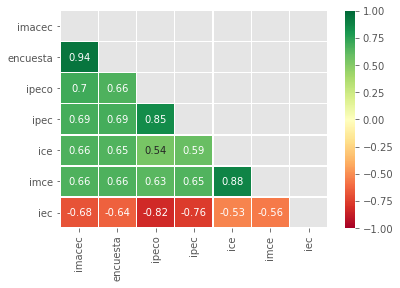

In [5]:
corr_mat = data.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

fig, ax =plt.subplots()
sns.heatmap(corr_mat, mask=mask, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=-1, vmax=1)

In [6]:
np.abs(corr_mat['imacec']).sort_values(ascending=False)

imacec      1.000000
encuesta    0.939560
ipeco       0.701012
ipec        0.686605
iec         0.680602
imce        0.662531
ice         0.658143
Name: imacec, dtype: float64

In [7]:
for e in ['encuesta', 'ipeco', 'ipec', 'ice', 'imce', 'iec']:
    data[e + '_l01'] = data[e].shift(1)
    data[e + '_l03'] = data[e].shift(3)
    data[e + '_l06'] = data[e].shift(6)
    data[e + '_l12'] = data[e].shift(12)

In [8]:
data.columns

Index(['imacec', 'encuesta', 'ipeco', 'ipec', 'ice', 'imce', 'iec',
       'encuesta_l01', 'encuesta_l03', 'encuesta_l06', 'encuesta_l12',
       'ipeco_l01', 'ipeco_l03', 'ipeco_l06', 'ipeco_l12', 'ipec_l01',
       'ipec_l03', 'ipec_l06', 'ipec_l12', 'ice_l01', 'ice_l03', 'ice_l06',
       'ice_l12', 'imce_l01', 'imce_l03', 'imce_l06', 'imce_l12', 'iec_l01',
       'iec_l03', 'iec_l06', 'iec_l12'],
      dtype='object')

In [9]:
corr_encuesta = data[['imacec', 'encuesta', 'encuesta_l01', 'encuesta_l03', 'encuesta_l06', 'encuesta_l12']].corr()
corr_ipeco = data[['imacec', 'ipeco', 'ipeco_l01', 'ipeco_l03', 'ipeco_l06', 'ipeco_l12']].corr()
corr_ipec = data[['imacec', 'ipec', 'ipec_l01', 'ipec_l03', 'ipec_l06', 'ipec_l12']].corr()
corr_ice = data[['imacec', 'ice', 'ice_l01', 'ice_l03', 'ice_l06', 'ice_l12']].corr()
corr_imce = data[['imacec', 'imce', 'imce_l01', 'imce_l03', 'imce_l06', 'imce_l12']].corr()
corr_iec = data[['imacec', 'iec', 'iec_l01', 'iec_l03', 'iec_l06', 'iec_l12']].corr()

In [10]:
correlaciones = {
        'encuesta': corr_encuesta['imacec'].iloc[1:].values,        
        'ipeco': corr_ipeco['imacec'].iloc[1:].values,
        'ipec': corr_ipec['imacec'].iloc[1:].values,
        'ice': corr_ice['imacec'].iloc[1:].values,
        'imce': corr_imce['imacec'].iloc[1:].values,
        'iec': np.abs(corr_iec['imacec'].iloc[1:].values)
    }

<AxesSubplot:>

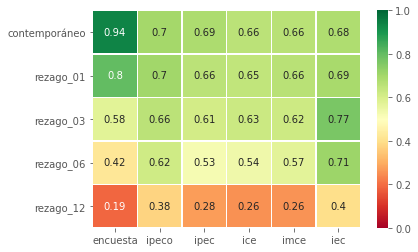

In [11]:
correlaciones = pd.DataFrame.from_dict(correlaciones)
correlaciones.index = ['contemporáneo', 'rezago_01', 'rezago_03', 'rezago_06', 'rezago_12']

fig, ax =plt.subplots()
sns.heatmap(correlaciones, annot=True, cmap='RdYlGn', linewidth=0.4, ax=ax, vmin=0, vmax=1)

In [12]:
correlaciones.transpose().idxmax()

contemporáneo    encuesta
rezago_01        encuesta
rezago_03             iec
rezago_06             iec
rezago_12             iec
dtype: object

In [13]:
correlaciones[['ipeco', 'ipec', 'ice', 'imce', 'iec']].transpose().idxmax()

contemporáneo    ipeco
rezago_01        ipeco
rezago_03          iec
rezago_06          iec
rezago_12          iec
dtype: object

In [19]:
print(correlaciones.mean().sort_values(ascending=False).round(2))
print('\n', correlaciones.mean().idxmax())

iec         0.65
ipeco       0.61
encuesta    0.59
imce        0.56
ipec        0.55
ice         0.55
dtype: float64

 iec


In [15]:
for e in correlaciones.columns:
    print(e, ':', correlaciones[e].idxmax())

encuesta : contemporáneo
ipeco : rezago_01
ipec : contemporáneo
ice : contemporáneo
imce : contemporáneo
iec : rezago_03


<AxesSubplot:xlabel='Fecha'>

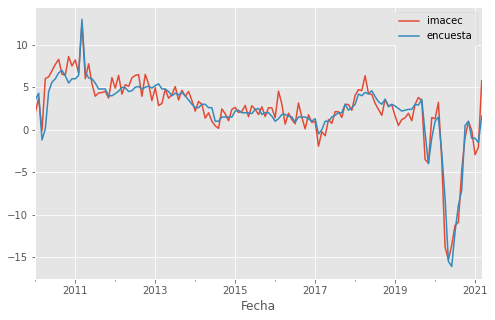

In [16]:
data[['imacec', 'encuesta']].dropna().plot(figsize=(8,5))

<AxesSubplot:xlabel='Fecha'>

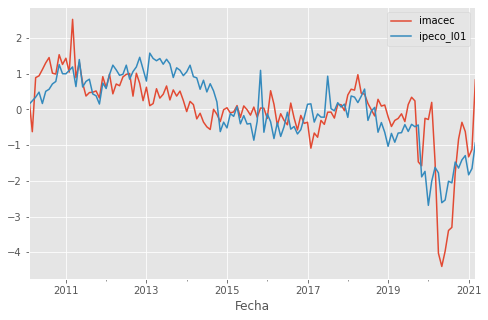

In [17]:
zdata = data[['imacec', 'ipeco_l01']]
zdata =(zdata - zdata.mean()) / zdata.std()
zdata = zdata.dropna()
zdata.plot(figsize=(8,5))

<AxesSubplot:xlabel='Fecha'>

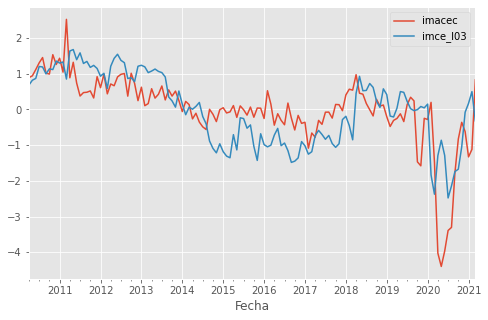

In [18]:
zdata = data[['imacec', 'imce_l03']]
zdata =(zdata - zdata.mean()) / zdata.std()
zdata = zdata.dropna()
zdata.plot(figsize=(8,5))